## Importing Libraries

In [1]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#matplotlib & seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the datasets
1. `spotify_daily_charts` : top 200 songs in the daily charts, has the streams count  
2. `spotify_daily_charts_tracks` : Has the audio features, duration and released date of the tracks in the top 200 charts  
3. `spotify_daily_charts_artists` : Has the genre information of the artist, total followers and popularity

In [2]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')

#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [3]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,88,0.358,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,87,0.748,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,1,0.783,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [4]:
#merge the charts and tracks dataset
df = charts_df.merge(tracks_df, on='track_id', how='left')

df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})
df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


How many unique artists in `df`? How many unique tracks?

In [5]:
df['artist'].nunique()

762

In [6]:
(df['track_id'].nunique(), df['track_name'].nunique())

(3284, 2566)

In [7]:
# read the artist dataset
df_artists = pd.read_csv('data/spotify_daily_charts_artists.csv')
df_artists.head()

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7279217,"['pop', 'talent show', 'uk pop']",86
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,17241689,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",85
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,28845735,"['pop', 'pop rock']",88
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,6407022,"['dance pop', 'pop', 'pop dance', 'post-teen p...",78


In [8]:
df_artists.tail()

,artist_id,artist_name,total_followers,genres,popularity
761,6XpaIBNiVzIetEPCWDvAFP,Whitney Houston,6178661,"['dance pop', 'pop', 'urban contemporary']",81
762,4QQgXkCYTt3BlENzhyNETg,"Earth, Wind & Fire",2709786,"['disco', 'funk', 'jazz funk', 'motown', 'quie...",76
763,0bBz5bRBkExaej2HxtVfCw,347aidan,121360,['sad rap'],73
764,05YVYeV4HxYp5rrWalvuE1,"Grover Washington, Jr.",176775,['jazz funk'],73
765,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,564714,"['pop', 'post-teen pop']",84


#### Filtering artists with 'pinoy indie', 'pinoy rock' genre tag.

In [9]:
list_artists = []
for index, row in df_artists[df_artists.genres.str.contains('indie|rock')].iterrows():
    artist_genres = set()
    for genre in row['genres'].split():
        artist_genres.add(genre.strip("\'[],"))
    if 'pinoy' in artist_genres:
        list_artists.append(row['artist_name'])
a = df_artists[df_artists.artist_name.isin(list_artists)]
a = a.rename(columns={'popularity' : 'artist_popularity'})
a.shape

(37, 5)

In [10]:
artist_genres

{'metal', 'opm', 'pinoy', 'rock'}

In [11]:
#create column tagging the 37 artists with a True value if they are part of the rap_artists list
df['indie_rock'] = df['artist'].apply(lambda x: 1 if x in list_artists else 0)

In [12]:
# note these counts have duplicate artist names
df['indie_rock'].value_counts()

0    266479
1     28121
Name: indie_rock, dtype: int64

In [13]:
df_indie_rock = df[df['indie_rock']==1]
df_indie_rock = df_indie_rock.drop(columns=['artist_name', 'indie_rock'])
(df_indie_rock['track_id'].nunique(), df_indie_rock['artist'].nunique())

(113, 37)

In [14]:
#Check null values in the columns
df_indie_rock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28121 entries, 24 to 294571
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              28121 non-null  datetime64[ns]
 1   position          28121 non-null  int64         
 2   track_id          28121 non-null  object        
 3   track_name        28121 non-null  object        
 4   artist            28121 non-null  object        
 5   streams           28121 non-null  int64         
 6   artist_id         28121 non-null  object        
 7   album_id          28121 non-null  object        
 8   duration          28121 non-null  int64         
 9   release_date      28121 non-null  object        
 10  popularity        28121 non-null  int64         
 11  danceability      28121 non-null  float64       
 12  energy            28121 non-null  float64       
 13  key               28121 non-null  int64         
 14  loudness          28

In [15]:
#Check for duplicates
df_indie_rock.duplicated().sum()

0

In [16]:
df_indie_rock.columns

Index(['date', 'position', 'track_id', 'track_name', 'artist', 'streams',
       'artist_id', 'album_id', 'duration', 'release_date', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

## EDA

In [18]:
viz_data = df_indie_rock.drop(columns=['date', 'position', 'track_id', 'track_name', 'artist', 'streams',\
                                    'artist_id', 'album_id', 'duration', 'release_date'])
viz_data.shape

(28121, 12)

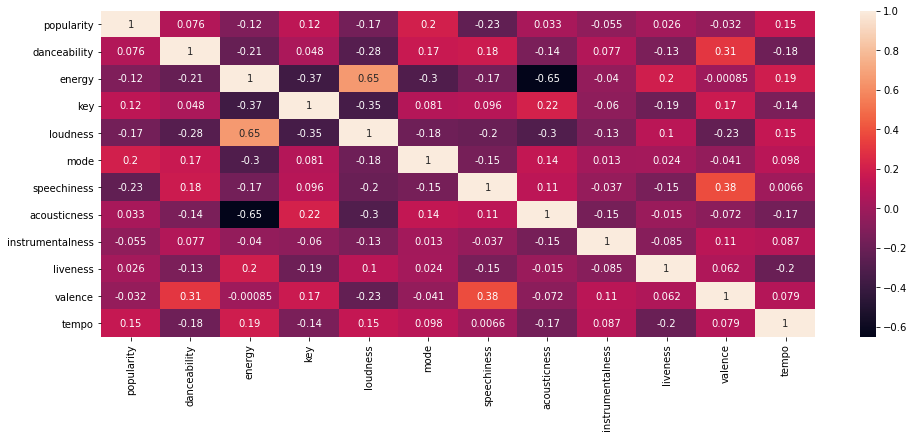

In [19]:
plt.subplots(figsize=(16, 6))
sns.heatmap(viz_data.corr(), annot=True)
plt.show()

## kNN

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report

In [ ]:
# #Select audio features to use for the model
# feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
#                 'liveness', 'valence', 'tempo']
# results_optimal_k = []

# kfolds= [4,5,8,10]

# for d in kfolds:
#     print('\nTuning kNN classification model with K-Fold=%d...' % d)
#     # create feature matrix (X)
#     X = df_indie_rock[feature_cols]
#     y = df_indie_rock['is_top100']

#     # creating training set, test set and checking shapes 
#     X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
#     print("Shape of X_Train:"+str(X_train.shape))
#     print("Shape of y_Train:"+str(Y_train.shape))
#     print("Shape of X_Test:"+str(X_test.shape))
#     print("Shape of y_Test:"+str(Y_test.shape))
    
#     #train model
#     cv_scores = []
#     neighbors=np.arange(2,51)
#     print('Finding best k...')
    
#     #Perform KNN using K= [1..50] and validate using k-fold k = [4,5,8,10]
#     for k in neighbors:
#         #print('Fitting for k=%d' % k)
#         knn = KNeighborsClassifier(n_neighbors=k)
#         scores = cross_val_score(knn, X_train, Y_train, cv=d, scoring='accuracy')
#         cv_scores.append(scores.mean())
        
#     # changeto misclassification error
#     mse = [1 - x for x in cv_scores]

#     # determining best k
#     optimal_k = neighbors[mse.index(min(mse))]
#     results_optimal_k.append(optimal_k)
    
#     knn_optimal = KNeighborsClassifier(n_neighbors=k)
#     knn_optimal.fit(X, y)
#     # plot misclassification error vs k
#     plt.plot(neighbors, mse)
#     plt.xlabel("Number of Neighbors K")
#     plt.ylabel("Misclassification Error")
#     plt.show()
    
#     print("The optimal number of neighbors is %d with score %d%%" % (optimal_k, 100*(1-min(mse))))
    
#     # predict the response
#     pred = knn_optimal.predict(X_test)

#     # evaluate accuracy
#     acc = accuracy_score(Y_test, pred) * 100
#     print('\nThe accuracy of the test classifier  is %f%%' % (acc))

In [ ]:
# # create feature matrix (X)
# feature_cols = ['energy', 'speechiness']
# X = df_indie_rock[feature_cols]
# y = df_indie_rock['position']

# # creating training set, test set and checking shapes 
# X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)  # 0.2 = 20% of my data set for testing
# print("Shape of X_Train:"+str(X_train.shape))
# print("Shape of y_Train:"+str(Y_train.shape))
# print("Shape of X_Test:"+str(X_test.shape))
# print("Shape of y_Test:"+str(Y_test.shape))

In [ ]:
# cv_scores = []

# neighbors=np.arange(2,51)

# for k in neighbors:
#     print('Fitting for k=%d' % k)
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')   # cv = k-fold
#     cv_scores.append(scores.mean())
    
# # changing to misclassification error
# mse = [1 - x for x in cv_scores]

# # determining best k
# optimal_k = neighbors[mse.index(min(mse))]
# print("The optimal number of neighbors is {}".format(optimal_k))

# # plot misclassification error vs k
# plt.plot(neighbors, mse)
# plt.xlabel("Number of Neighbors K")
# plt.ylabel("Misclassification Error")
# plt.show()

In [ ]:
# knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# # fitting the model
# knn_optimal.fit(X_train, Y_train)

# # predict the response
# pred = knn_optimal.predict(X_test)

# # evaluate accuracy
# acc = accuracy_score(Y_test, pred) * 100
# print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

### Undersampling

In [ ]:
# pip install imbalanced-learn

In [20]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


NearMiss version = 1

In [25]:
from imblearn.under_sampling import NearMiss
from numpy import where
from collections import Counter

# create feature matrix (X)
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
X = df_indie_rock[feature_cols]
y = df_indie_rock['is_top50']

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 24132, 1: 3989})
Counter({0: 3989, 1: 3989})


### Merging playlists

In [38]:
df_indie = pd.read_csv('data/df_merged_playlist1.csv')
df_rock  = pd.read_csv('data/df_merged_playlist2.csv')
(df_indie.shape, df_rock.shape)

((2813, 25), (3205, 25))

In [42]:
df_playlists = pd.concat([df_indie, df_rock])
df_playlists.shape

(6018, 25)

In [45]:
unique_top200 = df_indie_rock.groupby('track_id')[['position']].min().reset_index()
unique_top200

,track_id,position
0,0087fDVeNhuyMtST91RMjv,149
1,0BEpSEV02FM1N5gcw2fsJC,61
2,0DdC92EziGIEN6j7kTCKQX,87
3,0GGfPhGuWC2JGc7hlvjLXa,77
4,0GHwNr0lqf8jpc9wesmnHo,21
...,...,...
108,7gWKGNeHjIDUkNreiYYNdm,156
109,7gZ3kWNtIxFgxjsm5OTVMB,82
110,7h4W9blGxYCkKJ3dxPZ84j,52
111,7sW3f7PqDV7BQ7qqeVBJIA,38


In [53]:
df_playlists['track_id'].isin(unique_top200['track_id']).value_counts()

False    5517
True      501
Name: track_id, dtype: int64

In [55]:
df_playlists['is_top200'] = df_playlists['track_id'].isin(unique_top200['track_id'])

In [59]:
df_playlists[df_playlists['is_top200']==True]['artist_name'].unique()

array(['Autotelic', 'Leanne & Naara', 'SUD', 'Up Dharma Down', 'Kiana V',
       'IV Of Spades', 'Clara Benin', 'I Belong to the Zoo',
       'Unique Salonga', 'Callalily', 'juan karlos', 'Midnight Meetings',
       'Orange & Lemons', 'Arthur Nery', 'Reese Lansangan',
       'Paolo Sandejas', 'Rob Deniel', 'Join The Club', 'Alisson Shore',
       'Reneé Dominique', 'Gracenote', 'Ebe Dancel', 'Mayonnaise',
       'Agsunta', 'Hale', 'The Itchyworms', 'Silent Sanctuary',
       'Parokya Ni Edgar', 'Kamikazee', 'Eraserheads', 'Rivermaya',
       'Moonstar88', '6cyclemind', 'Sponge Cola', 'Imago', 'Slapshock'],
      dtype=object)

In [77]:
df_isnot_top200 = df_playlists[df_playlists['is_top200']==False]

In [78]:
df_isnot_top200.shape

(5517, 26)

In [69]:
df_indie_rock.shape

(28121, 24)

In [70]:
df_indie_rock.columns

Index(['date', 'position', 'track_id', 'track_name', 'artist', 'streams',
       'artist_id', 'album_id', 'duration', 'release_date', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'is_top50', 'unique'],
      dtype='object')

In [83]:
df_indie_rock1 = df_indie_rock.drop(columns= ['date', 'position', 'track_id', 'track_name', 'artist', 'streams',
       'artist_id', 'album_id', 'duration', 'release_date','is_top50', 'unique'])

In [84]:
df_indie_rock1['is_top200'] = 1

In [85]:
df_indie_rock1.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_top200
24,62,0.635,0.3760,9,-6.100,1,0.0457,0.0104,0.0000,0.1090,0.280,124.570,1
39,65,0.696,0.2620,11,-15.073,1,0.0310,0.5190,0.0000,0.0669,0.265,84.007,1
45,68,0.686,0.3220,6,-13.200,1,0.0369,0.1650,0.0296,0.0809,0.511,155.982,1
54,33,0.757,0.6690,11,-8.813,1,0.0385,0.2950,0.0271,0.1110,0.963,113.010,1
76,63,0.567,0.0896,5,-12.944,1,0.0343,0.7960,0.0000,0.2180,0.367,79.002,1


In [87]:
df_isnot_top200.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'playlist_id_x',
       'playlist_name_x', 'playlist_id_y', 'playlist_name_y', 'duration_mins',
       'genre', 'is_top200'],
      dtype='object')

In [88]:
df_isnot_top200 = df_isnot_top200.drop(columns = ['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date','playlist_id_x',
       'playlist_name_x', 'playlist_id_y', 'playlist_name_y', 'duration_mins',
       'genre'])

In [89]:
df_isnot_top200.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_top200
0,29,0.475,0.157,0,-13.932,1,0.0307,0.785,0.002120,0.1070,0.0806,119.836,0
1,37,0.406,0.742,8,-3.135,1,0.0356,0.215,0.000410,0.0943,0.5640,179.959,0
2,25,0.523,0.759,4,-5.652,1,0.0295,0.011,0.000769,0.1090,0.6030,90.026,0
3,46,0.603,0.196,6,-14.843,1,0.0443,0.940,0.000001,0.0916,0.1600,119.529,0
4,46,0.603,0.196,6,-14.843,1,0.0443,0.940,0.000001,0.0916,0.1600,119.529,0


In [86]:
df_isnot_top200['is_top200'] = 0

<ipython-input-86-9bf8e1222d69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isnot_top200['is_top200'] = 0


In [94]:
df_clean = pd.concat([df_isnot_top200, df_indie_rock1], axis = 0)
df_clean.drop_duplicates(inplace = True)
df_clean.shape

(3384, 13)

In [96]:
df_clean['is_top200'].value_counts()

0    3272
1     112
Name: is_top200, dtype: int64

In [102]:
df_clean.to_csv('data/df_clean.csv', index=False, encoding='utf-8')

### NearMiss version = 1

In [97]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
X = df_clean[feature_cols]
y = df_clean['is_top200']

In [98]:
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 3272, 1: 112})
Counter({0: 112, 1: 112})


In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)  # 0.2 = 20% of my data set for testing
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(179, 9)
Shape of y_Train:(179,)
Shape of X_Test:(45, 9)
Shape of y_Test:(45,)


Fitting for k=2
Fitting for k=3
Fitting for k=4
Fitting for k=5
Fitting for k=6
Fitting for k=7
Fitting for k=8
Fitting for k=9
Fitting for k=10
Fitting for k=11
Fitting for k=12
Fitting for k=13
Fitting for k=14
Fitting for k=15
Fitting for k=16
Fitting for k=17
Fitting for k=18
Fitting for k=19
Fitting for k=20
Fitting for k=21
Fitting for k=22
Fitting for k=23
Fitting for k=24
Fitting for k=25
Fitting for k=26
Fitting for k=27
Fitting for k=28
Fitting for k=29
Fitting for k=30
Fitting for k=31
Fitting for k=32
Fitting for k=33
Fitting for k=34
Fitting for k=35
Fitting for k=36
Fitting for k=37
Fitting for k=38
Fitting for k=39
Fitting for k=40
Fitting for k=41
Fitting for k=42
Fitting for k=43
Fitting for k=44
Fitting for k=45
Fitting for k=46
Fitting for k=47
Fitting for k=48
Fitting for k=49
Fitting for k=50
The optimal number of neighbors is 5


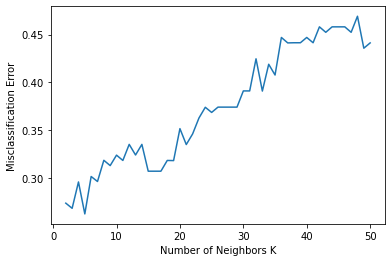


The accuracy of the knn classifier for k = 5 is 68.888889%


In [100]:
cv_scores = []

neighbors=np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')   # cv = k-fold
    cv_scores.append(scores.mean())
    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

####################################################
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

### NearMiss version = 2

In [139]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
X = df_clean[feature_cols]
y = df_clean['is_top200']

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 3272, 1: 112})
Counter({0: 112, 1: 112})


In [140]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)  # 0.2 = 20% of my data set for testing
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(179, 9)
Shape of y_Train:(179,)
Shape of X_Test:(45, 9)
Shape of y_Test:(45,)


Fitting for k=2
Fitting for k=3
Fitting for k=4
Fitting for k=5
Fitting for k=6
Fitting for k=7
Fitting for k=8
Fitting for k=9
Fitting for k=10
Fitting for k=11
Fitting for k=12
Fitting for k=13
Fitting for k=14
Fitting for k=15
Fitting for k=16
Fitting for k=17
Fitting for k=18
Fitting for k=19
Fitting for k=20
Fitting for k=21
Fitting for k=22
Fitting for k=23
Fitting for k=24
Fitting for k=25
Fitting for k=26
Fitting for k=27
Fitting for k=28
Fitting for k=29
Fitting for k=30
Fitting for k=31
Fitting for k=32
Fitting for k=33
Fitting for k=34
Fitting for k=35
Fitting for k=36
Fitting for k=37
Fitting for k=38
Fitting for k=39
Fitting for k=40
Fitting for k=41
Fitting for k=42
Fitting for k=43
Fitting for k=44
Fitting for k=45
Fitting for k=46
Fitting for k=47
Fitting for k=48
Fitting for k=49
Fitting for k=50
The optimal number of neighbors is 5


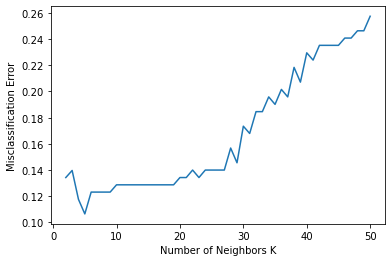


The accuracy of the knn classifier for k = 5 is 91.111111%
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.95      0.87      0.91        23

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [141]:
cv_scores = []

neighbors=np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')   # cv = k-fold
    cv_scores.append(scores.mean())
    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

####################################################
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

#Classification Report
print(classification_report(Y_test,knn_optimal.predict(X_test)))

In [ ]:
# Using permutation_importance to get the feature importance of kNN model

from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(knn_optimal, X_train, Y_train, scoring='accuracy')
# get importance
importance = results.importances_mean

#plot
feat_importances = pd.Series(importance, index=feature_cols)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')

### NearMiss Version = 3

In [114]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
X = df_clean[feature_cols]
y = df_clean['is_top200']

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 3272, 1: 112})
Counter({0: 112, 1: 112})


In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)  # 0.2 = 20% of my data set for testing
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(179, 9)
Shape of y_Train:(179,)
Shape of X_Test:(45, 9)
Shape of y_Test:(45,)


Fitting for k=2
Fitting for k=3
Fitting for k=4
Fitting for k=5
Fitting for k=6
Fitting for k=7
Fitting for k=8
Fitting for k=9
Fitting for k=10
Fitting for k=11
Fitting for k=12
Fitting for k=13
Fitting for k=14
Fitting for k=15
Fitting for k=16
Fitting for k=17
Fitting for k=18
Fitting for k=19
Fitting for k=20
Fitting for k=21
Fitting for k=22
Fitting for k=23
Fitting for k=24
Fitting for k=25
Fitting for k=26
Fitting for k=27
Fitting for k=28
Fitting for k=29
Fitting for k=30
Fitting for k=31
Fitting for k=32
Fitting for k=33
Fitting for k=34
Fitting for k=35
Fitting for k=36
Fitting for k=37
Fitting for k=38
Fitting for k=39
Fitting for k=40
Fitting for k=41
Fitting for k=42
Fitting for k=43
Fitting for k=44
Fitting for k=45
Fitting for k=46
Fitting for k=47
Fitting for k=48
Fitting for k=49
Fitting for k=50
The optimal number of neighbors is 2


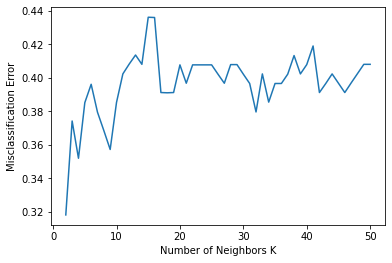


The accuracy of the knn classifier for k = 2 is 77.777778%
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        25
           1       1.00      0.50      0.67        20

    accuracy                           0.78        45
   macro avg       0.86      0.75      0.75        45
weighted avg       0.84      0.78      0.76        45



In [116]:
cv_scores = []

neighbors=np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')   # cv = k-fold
    cv_scores.append(scores.mean())
    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

####################################################
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

#Classification Report
print(classification_report(Y_test,knn_optimal.predict(X_test)))

### Model Selection
knn.optimal_predict value from **undersampled version=2**

In [142]:
df_clean['predicted_top200'] = df_clean.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
df_clean['predicted_top200_prob'] = df_clean.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
print("using Version2 in undersampling")
df_clean

using Version2 in undersampling


,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_top200,predicted_top200,predicted_top200_prob
0,29,0.475,0.157,0,-13.932,1,0.0307,0.785000,0.002120,0.1070,0.0806,119.836,0,0,0.8
1,37,0.406,0.742,8,-3.135,1,0.0356,0.215000,0.000410,0.0943,0.5640,179.959,0,1,1.0
2,25,0.523,0.759,4,-5.652,1,0.0295,0.011000,0.000769,0.1090,0.6030,90.026,0,1,1.0
3,46,0.603,0.196,6,-14.843,1,0.0443,0.940000,0.000001,0.0916,0.1600,119.529,0,0,0.8
5,30,0.385,0.233,11,-16.567,0,0.0358,0.937000,0.002000,0.0695,0.1800,78.666,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275629,73,0.655,0.385,1,-8.967,0,0.0355,0.398000,0.005640,0.1120,0.4290,120.016,1,0,0.6
277789,63,0.292,0.397,7,-9.161,1,0.0346,0.755000,0.000000,0.2800,0.1870,86.491,1,1,1.0
284503,52,0.452,0.725,3,-7.894,1,0.1120,0.011100,0.000000,0.1070,0.7050,100.931,1,1,1.0
284540,52,0.534,0.957,10,-4.572,0,0.1160,0.000031,0.000005,0.0683,0.3680,125.013,1,0,0.8


In [136]:
df_clean['predicted_top200'].value_counts()

1    3075
0     309
Name: predicted_top200, dtype: int64

In [143]:
df_clean[(df_clean['predicted_top200']!=df_clean['is_top200'])&(df_clean['predicted_top200_prob']>0.9)]

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_top200,predicted_top200,predicted_top200_prob
1,37,0.406,0.7420,8,-3.135,1,0.0356,0.2150,0.000410,0.0943,0.564,179.959,0,1,1.0
2,25,0.523,0.7590,4,-5.652,1,0.0295,0.0110,0.000769,0.1090,0.603,90.026,0,1,1.0
5,30,0.385,0.2330,11,-16.567,0,0.0358,0.9370,0.002000,0.0695,0.180,78.666,0,1,1.0
6,38,0.653,0.6390,11,-6.385,0,0.0365,0.4030,0.127000,0.0571,0.312,75.981,0,1,1.0
7,32,0.837,0.0935,6,-14.953,1,0.0474,0.8670,0.000010,0.1110,0.390,105.047,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,14,0.471,0.8050,9,-7.466,1,0.0780,0.0476,0.000865,0.1420,0.884,174.177,0,1,1.0
3200,38,0.622,0.2840,9,-7.574,1,0.0325,0.8550,0.000000,0.1070,0.376,73.932,0,1,1.0
3202,0,0.398,0.3720,5,-8.095,1,0.0319,0.5290,0.002270,0.2710,0.520,99.946,0,1,1.0
79374,51,0.848,0.6370,10,-6.831,0,0.0422,0.1500,0.000011,0.1460,0.912,120.004,1,0,1.0


In [144]:
df_clean[(df_clean['predicted_top200']!=df_clean['is_top200'])&(df_clean['predicted_top200_prob']>0.9)]['predicted_top200'].value_counts()

1    2831
0       2
Name: predicted_top200, dtype: int64

In [158]:
df_clean[(df_clean['predicted_top200'] == df_clean['is_top200'])&(df_clean['is_top200']==1)]

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_top200,predicted_top200,predicted_top200_prob
39,65,0.696,0.2620,11,-15.073,1,0.0310,0.5190,0.000000,0.0669,0.265,84.007,1,1,1.0
45,68,0.686,0.3220,6,-13.200,1,0.0369,0.1650,0.029600,0.0809,0.511,155.982,1,1,1.0
54,33,0.757,0.6690,11,-8.813,1,0.0385,0.2950,0.027100,0.1110,0.963,113.010,1,1,1.0
76,63,0.567,0.0896,5,-12.944,1,0.0343,0.7960,0.000000,0.2180,0.367,79.002,1,1,1.0
77,58,0.662,0.5460,2,-5.868,1,0.0288,0.2040,0.000003,0.1200,0.196,115.053,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252165,48,0.421,0.4850,7,-7.446,1,0.0333,0.7970,0.000020,0.1170,0.164,132.172,1,1,1.0
256797,63,0.746,0.3500,2,-8.649,1,0.0740,0.5720,0.000007,0.1180,0.612,80.026,1,1,1.0
274962,63,0.229,0.6970,6,-5.298,1,0.0304,0.0342,0.000000,0.0749,0.292,152.236,1,1,1.0
277789,63,0.292,0.3970,7,-9.161,1,0.0346,0.7550,0.000000,0.2800,0.187,86.491,1,1,1.0


In [150]:
df_lola = pd.read_csv('data/artist_data_lola_amour.csv')
df_lola = df_lola.rename(columns={"track_popularity": "popularity"})

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


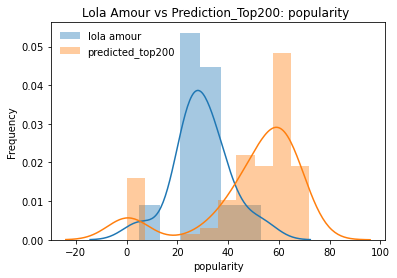

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


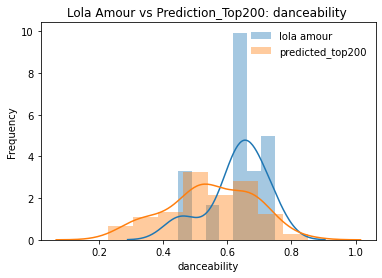

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


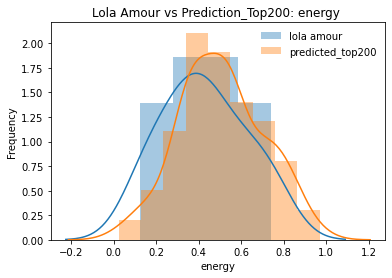

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


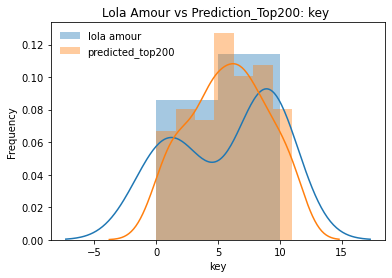

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


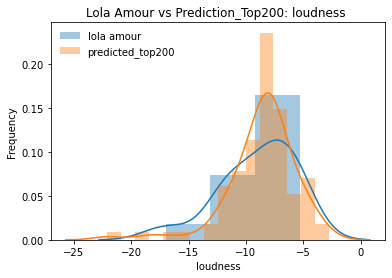

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


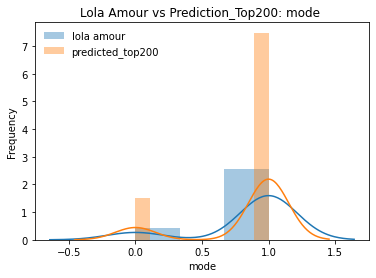

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


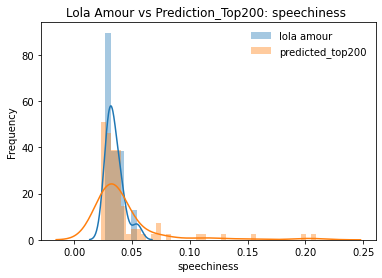

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


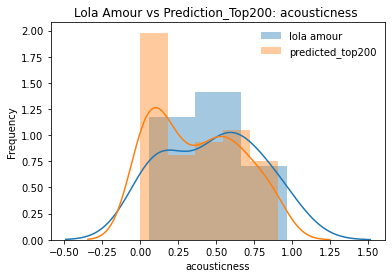

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


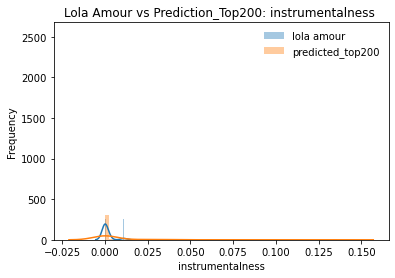

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


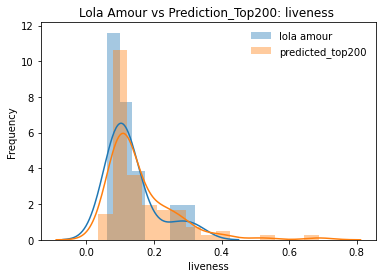

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


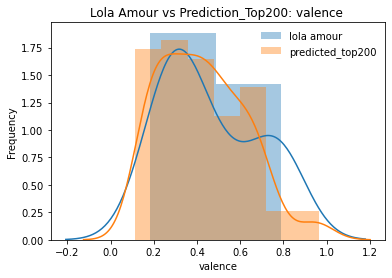

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


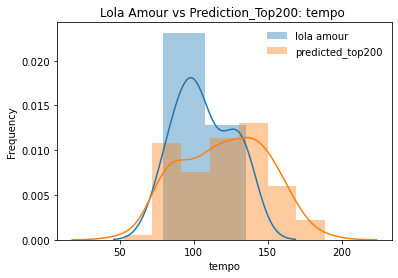

In [160]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(df_lola[col], ax=ax, label= 'lola amour')
    sns.distplot(df_clean[(df_clean['predicted_top200'] == df_clean['is_top200'])&(df_clean['is_top200']==1)][col], ax=ax, label= 'predicted_top200')
    
    plt.title("Lola Amour vs Prediction_Top200: %s " % (col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()

In [153]:
df_clean[(df_clean['predicted_top200'] == df_clean['is_top200'])].describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_top200,predicted_top200,predicted_top200_prob
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.00000,401.000000,401.000000,401.000000
mean,26.241895,0.596823,0.556887,5.274314,-8.905723,0.807980,0.052896,0.321971,0.028996,0.164949,0.468307,122.00191,0.236908,0.236908,0.829925
std,21.221306,0.133887,0.226695,3.390363,3.783286,0.394381,0.050821,0.304683,0.111621,0.109366,0.230790,14.18683,0.425716,0.425716,0.171762
min,0.000000,0.207000,0.025000,0.000000,-23.651000,0.000000,0.023200,0.000011,0.000000,0.027900,0.033900,52.57200,0.000000,0.000000,0.600000
25%,6.000000,0.516000,0.375000,2.000000,-10.922000,1.000000,0.031000,0.044200,0.000000,0.093600,0.284000,119.98500,0.000000,0.000000,0.600000
50%,24.000000,0.606000,0.563000,5.000000,-8.205000,1.000000,0.036100,0.204000,0.000027,0.119000,0.438000,122.16700,0.000000,0.000000,0.800000
75%,43.000000,0.681000,0.731000,8.000000,-6.387000,1.000000,0.049900,0.573000,0.002090,0.208000,0.633000,125.04100,0.000000,0.000000,1.000000
max,72.000000,0.963000,0.997000,11.000000,-1.622000,1.000000,0.503000,0.971000,0.880000,0.688000,0.969000,188.74400,1.000000,1.000000,1.000000


### Predicted df

In [156]:
# df_clean[(df_clean['predicted_top200'] == df_clean['is_top200'])].to_csv('data/predicted_top_200_features.csv', index=False, encoding='utf-8')